In [33]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt
import os


# Create directories to save images
os.makedirs('./cameras/camera1_rgb', exist_ok=True)
os.makedirs('./cameras/camera2_rgb', exist_ok=True)
os.makedirs('./cameras/camera1_depth', exist_ok=True)  # Directory for camera 1 depth images
os.makedirs('./cameras/camera2_depth', exist_ok=True)  # Directory for camera 2 depth images

# Enumerate connected RealSense cameras and select two
ctx = rs.context()
devices = ctx.query_devices()
devices = [devices[i].get_info(rs.camera_info.serial_number) for i in range(len(devices))]
devices.sort()
selected_devices = devices[:2]  # Select the first two devices
print("Selected devices serial numbers:", selected_devices)

# Initialize RealSense pipelines for both cameras
pipeline1 = rs.pipeline()
config1 = rs.config()
config1.enable_device(selected_devices[0])
config1.enable_stream(rs.stream.color, 1920, 1080, rs.format.rgb8, 30)
config1.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16, 30)  # Enable depth stream for camera 1

pipeline2 = rs.pipeline()
config2 = rs.config()
config2.enable_device(selected_devices[1])
config2.enable_stream(rs.stream.color, 1920, 1080, rs.format.rgb8, 30)
config2.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16, 30)  # Enable depth stream for camera 2

# Start streaming for both cameras
pipeline1.start(config1)
pipeline2.start(config2)

# Create align object for aligning depth frames to color frames
align1 = rs.align(rs.stream.color)
align2 = rs.align(rs.stream.color)

try:
    frame_num = 7
    while True:
        # Wait for the next set of frames from camera 1
        frames1 = pipeline1.wait_for_frames()
        aligned_frames1 = align1.process(frames1)
        color_frame1 = aligned_frames1.get_color_frame()
        depth_frame1 = aligned_frames1.get_depth_frame()  # Get the depth frame from camera 1

        if not color_frame1 or not depth_frame1:
            continue

        # Convert color and depth frames to numpy arrays
        color_image1 = np.asanyarray(color_frame1.get_data())
        depth_image1 = np.asanyarray(depth_frame1.get_data())

        # Save the RGB and depth images from camera 1
        rgb_filename1 = f'./cameras/camera1_rgb/frame_{frame_num:06d}.png'
        depth_filename1 = f'./cameras/camera1_depth/frame_{frame_num:06d}.png'
        plt.imsave(rgb_filename1, color_image1)
        plt.imsave(depth_filename1, depth_image1, cmap='gray')
        print(f"Saved {rgb_filename1}")
        print(f"Saved {depth_filename1}")

        # Wait for the next set of frames from camera 2
        frames2 = pipeline2.wait_for_frames()
        aligned_frames2 = align2.process(frames2)
        color_frame2 = aligned_frames2.get_color_frame()
        depth_frame2 = aligned_frames2.get_depth_frame()  # Get the depth frame from camera 2

        if not color_frame2 or not depth_frame2:
            continue

        # Convert color and depth frames to numpy arrays
        color_image2 = np.asanyarray(color_frame2.get_data())
        depth_image2 = np.asanyarray(depth_frame2.get_data())

        # Save the RGB and depth images from camera 2
        rgb_filename2 = f'./cameras/camera2_rgb/frame_{frame_num:06d}.png'
        depth_filename2 = f'./cameras/camera2_depth/frame_{frame_num:06d}.png'
        plt.imsave(rgb_filename2, color_image2)
        plt.imsave(depth_filename2, depth_image2, cmap='gray')
        print(f"Saved {rgb_filename2}")
        print(f"Saved {depth_filename2}")

        break  # Remove this break to continuously capture and save frames

except KeyboardInterrupt:
    # Stop streaming for both cameras if interrupted by the user
    pipeline1.stop()
    pipeline2.stop()


Selected devices serial numbers: ['145422070656', '233522072900']
Saved ./cameras/camera1_rgb/frame_000007.png
Saved ./cameras/camera1_depth/frame_000007.png
Saved ./cameras/camera2_rgb/frame_000007.png
Saved ./cameras/camera2_depth/frame_000007.png


(-0.5, 1919.5, 1079.5, -0.5)

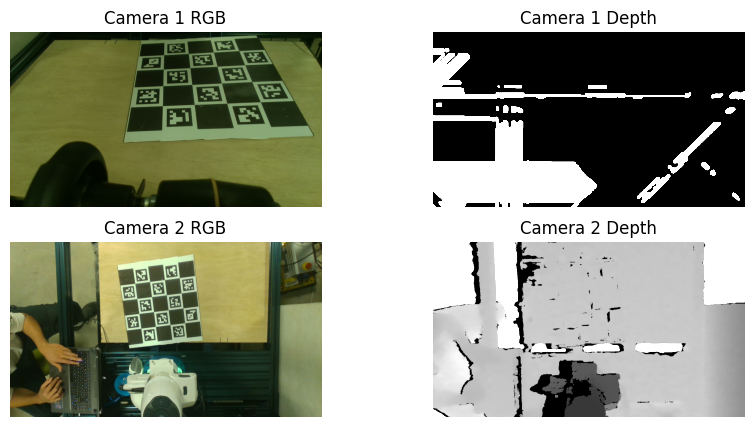

In [34]:
# visualize the saved images
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(color_image1)
plt.title('Camera 1 RGB')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(depth_image1, cmap='gray', vmin=100, vmax=1000)
plt.title('Camera 1 Depth')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(color_image2)
plt.title('Camera 2 RGB')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(depth_image2, cmap='gray', vmin=100, vmax=1500)
plt.title('Camera 2 Depth')
plt.axis('off')